# AM2061 Algorithm 2-4
## Secant Method

The Secant Method is an algoritm used to determine the roots of Non-linear functions, based off of Newtons Method. 

It uses a Taylor expansion of the function about the root $p$ and then an approximation of the derivative.

A brief explanation is as follows:

* Take Newtons Method, but now use the approximation:

\begin{equation} f'(p_{n-1}) \approx \frac{f(p_{n-2}) - f(p_{n-1})}{p_{n-2} - p_{n-1}} \end{equation}

* We must first provide two initial guesses $p_0$ and $p_1$, if these guesses are too far from the actual, issues may arise. (related to Fixed Point Theorem)

* Upon doing so, we can then employ the sequence:

\begin{equation} p_n = p_{n-1} - \frac{f(p_{n-1})(p_{n-2} - p_{n-1})}{f(p_{n-2}) - f(p_{n-1})} \end{equation}

* To do this, we simply:
  * Set $p = p_1 - \frac{f(p_1)(p_0 - p_1)}{f(p_0) - f(p_1)}$
  * Perform our check.
  * Set $p_0 = p_1$
  * Set $p_1 = p$
    
* We repeat this procedure until either:
  * $\left | p - p_1 \right | < ERR$, so we have found the root within the allowed error. (successful state)
  * At max number of iterations. (unsuccessful state)

The following is the pseudocode provided:

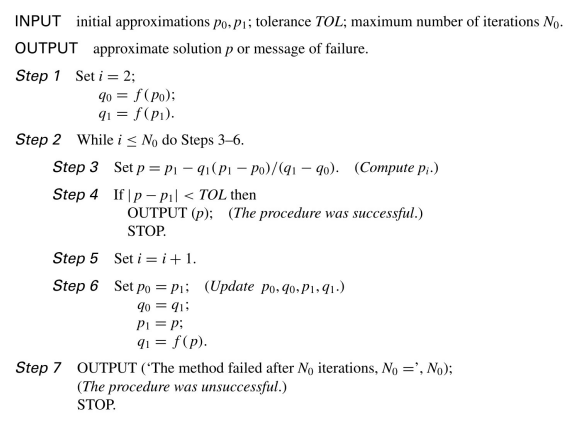

Let us now create this in Python.

First we must define a function, note that any function can be used, for simplicity I will use what was given in L06 as before. We can find the roots analytically:

\begin{equation} f(x) = cos(x) - x \end{equation}

This equation has a root of $x = 0.73908513...$. This is the value we expect to find:

In [1]:
import math

# Using the lambda function to showcase
functionUsed = lambda x: math.cos(x) - x

Now let us define the algorithm, we will need the initial approximation, the function, the allowed error, and the max number of iterations.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
def SecantMethod(p0, p1, func, ERR, N):
    i = 1
    
    while i <= N: # while not at max iterations
        p = p1 - (func(p1) * (p0 - p1)) / (func(p0) - func(p1)) # next approx.
        
        if abs(p - p1) < ERR: # if difference in previous and next approx. are within allowed error
            print(f"Root = {p}")
            print("Procedure completed successfully.")
            break # ends while loop
        
        p0 = p1 # update previous
        p1 = p
        i += 1
    
    if i > N:
        print(f"Method failed after {N} iterations.")
        print("Procedure was unsuccessful.")

We can now test this algorithm for a root. Note that for a simple function such as this we can get really close to the actual answer with a small amount of iterations!

Further note that if a very bad approximation is given the code may stall, this is because the Secant method only works within good approximations.

In [3]:
SecantMethod(0.5, 0.8, functionUsed, 0.000000000000001, 10)

Root = 0.7390851332151607
Procedure completed successfully.


The following is what a failed procedure looks like (note used a very small number of iterations):

In [4]:
SecantMethod(0.5, 0.8, functionUsed, 0.000000000000001, 1)

Method failed after 1 iterations.
Procedure was unsuccessful.
